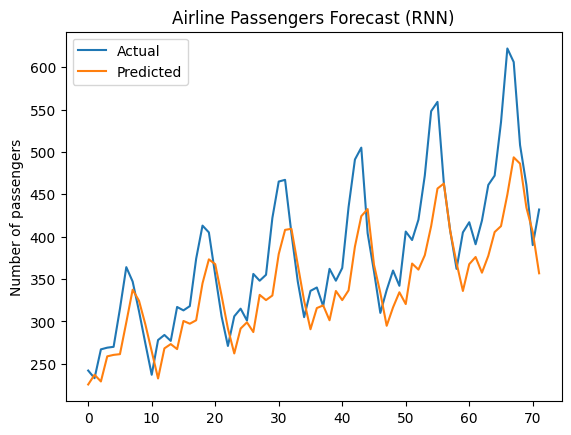

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the monthly returns data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/13주차/airline-passengers.csv', index_col=0)
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# Define the number of lagged returns to include in the regression
num_lags = 1
# Calculate the lagged returns for the past num_lags months for the current company
lagged_df = pd.concat([df.shift(i) for i in range(num_lags + 1)], axis=1)
# Drop the lines that have N.A.
lagged_df = lagged_df.dropna()
# Extract the returns data for the current company
passenger_lagged_data = lagged_df.values
# Add the returns data to the X and y lists
X = passenger_lagged_data[:, 1:] # exclude first column for y
y = passenger_lagged_data[:, 0] # select first column for y

train_size = int( len(passenger_lagged_data)*0.5 )
X_train = X[0:train_size,:]
y_train = y[0:train_size]
X_test = X[train_size:,:]
y_test = y[train_size:]
X_train = X_train.reshape(-1, 1, num_lags)
SimpleRNN_model = keras.Sequential([ keras.layers.SimpleRNN(4, input_shape=(1,num_lags)), keras.layers.Dense(10),
keras.layers.Dense(1)
])
SimpleRNN_model.compile(loss='mean_squared_error', optimizer='adam')
SimpleRNN_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
X_test = X_test.reshape(-1, 1, num_lags)
y_test_pred = SimpleRNN_model.predict( X_test, verbose=0 )
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Airline Passengers Forecast (RNN)')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

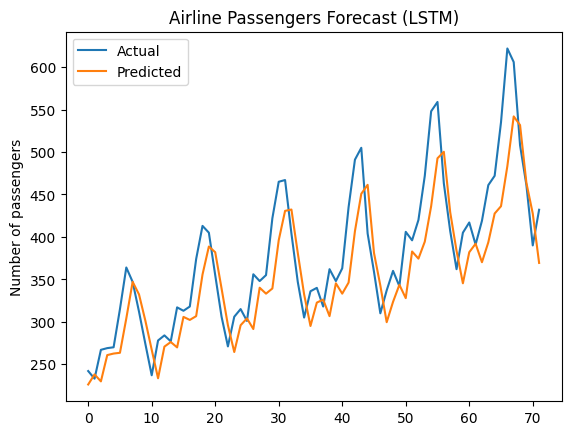

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Read the monthly returns data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/13주차/airline-passengers.csv', index_col=0)
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# Define the number of lagged returns to include in the regression
num_lags = 1
# Calculate the lagged returns for the past num_lags months for the current company
lagged_df = pd.concat([df.shift(i) for i in range(num_lags + 1)], axis=1)
# Drop the lines that have N.A.
lagged_df = lagged_df.dropna()
# Extract the returns data for the current company
passenger_lagged_data = lagged_df.values
# Add the returns data to the X and y lists
X = passenger_lagged_data[:, 1:] # exclude first column for y
y = passenger_lagged_data[:, 0] # select first column for y
train_size = int( len(passenger_lagged_data)*0.5 )
X_train = X[0:train_size,:]
y_train = y[0:train_size]
X_test = X[train_size:,:]
y_test = y[train_size:]
X_train = X_train.reshape(-1, 1, num_lags)

LSTM_model = keras.Sequential([ keras.layers.LSTM(4, input_shape=(1,num_lags)), keras.layers.Dense(10),
keras.layers.Dense(1)
])

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
X_test = X_test.reshape(-1, 1, num_lags)
y_test_pred = LSTM_model.predict( X_test, verbose=0 )
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Airline Passengers Forecast (LSTM)')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()


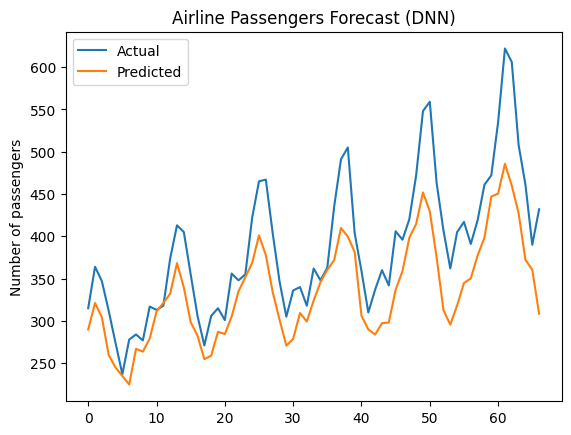

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Read the monthly returns data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/13주차/airline-passengers.csv', index_col=0)
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# Define the number of lagged returns to include in the regression
num_lags = 10
# Calculate the lagged returns for the past num_lags months for the current company
lagged_df = pd.concat([df.shift(i) for i in range(num_lags + 1)], axis=1)
# Drop the lines that have N.A.
lagged_df = lagged_df.dropna()
# Extract the returns data for the current company
passenger_lagged_data = lagged_df.values
# Add the returns data to the X and y lists
X = passenger_lagged_data[:, 1:] # exclude first column for y
y = passenger_lagged_data[:, 0] # select first column for y
train_size = int( len(passenger_lagged_data)*0.5 )
X_train = X[0:train_size,:]
y_train = y[0:train_size]
X_test = X[train_size:,:]
y_test = y[train_size:]

DNN_model = keras.Sequential([
keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'), keras.layers.Dense(10, activation='relu'),
keras.layers.Dense(1)
])

DNN_model.compile(loss='mean_squared_error', optimizer='adam')
DNN_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
y_test_pred = DNN_model.predict( X_test, verbose=0 )
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Airline Passengers Forecast (DNN)')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

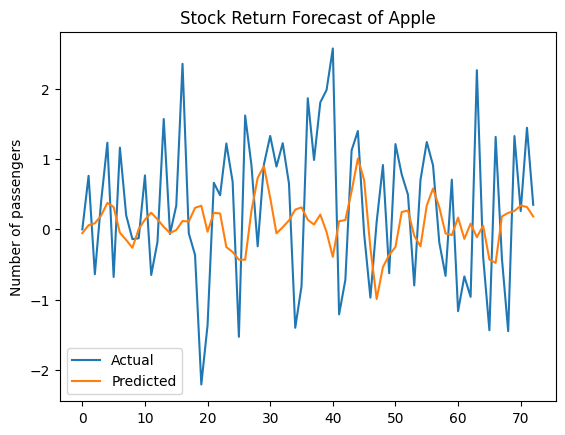

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the monthly returns data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sp100_returns_data.csv', index_col=0)
df = df[['AAPL']] # Let's just consider Apple's stock only. df = df.dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Define the number of lagged returns to include in the regression
num_lags = 12

# Calculate the lagged returns for the past num_lags months for the current company
lagged_df = pd.concat([df.shift(i) for i in range(num_lags + 1)], axis=1)

# Drop the lines that have N.A.
lagged_df = lagged_df.dropna()

# Extract the returns data for the current company
passenger_lagged_data = lagged_df.values

# Add the returns data to the X and y lists
X = passenger_lagged_data[:, 1:] # exclude first column for y
y = passenger_lagged_data[:, 0] # select first column for y

train_size = int( len(passenger_lagged_data)*0.5 )

X_train = X[0:train_size,:]
y_train = y[0:train_size]

X_test = X[train_size:,:]
y_test = y[train_size:]

#past returns, past trading volume ,~~~~~
X_train = X_train.reshape(-1, 1, num_lags)

LSTM_model = keras.Sequential([ keras.layers.LSTM(4, input_shape=(1,num_lags)), keras.layers.Dense(10),
keras.layers.Dense(1)
])

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

X_test = X_test.reshape(-1, 1, num_lags)
y_test_pred = LSTM_model.predict( X_test, verbose=0 )

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
#여기까지
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Stock Return Forecast of Apple')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

#

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the monthly returns data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sp100_returns_data.csv', index_col=0)   #이거 수정
df = df[['AAPL']]  # Apple 주식만 고려합니다.
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Define the number of lagged returns to include in the regression
num_lags = 3

# Calculate the lagged returns for the past num_lags months for the current company
lagged_df = pd.concat([df.shift(i) for i in range(num_lags + 1)], axis=1)

# Drop the lines that have N.A.
lagged_df = lagged_df.dropna()

# Extract the returns data for the current company
apple_lagged_data = lagged_df.values

# Add the returns data to the X and y lists
X = apple_lagged_data[:, 1:]  # exclude first column for y
y = apple_lagged_data[:, 0]  # select first column for y

train_size = int(len(apple_lagged_data) * 0.5)

X_train = X[0:train_size, :]
y_train = y[0:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

X_train = X_train.reshape(-1, num_lags, 1)

LSTM_model = keras.Sequential([
    keras.layers.LSTM(4, input_shape=(num_lags, 1)),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

X_test = X_test.reshape(-1, num_lags, 1)
y_test_pred = LSTM_model.predict(X_test, verbose=0)

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)

# Read the bond return data from the CSV file
bond_returns = pd.read_csv('/content/drive/MyDrive/파이낸셜/9주차/bond_returns_data.csv', index_col=0)
bond_returns = bond_returns/100

active_wealth = 10000
for t in range(len(y_test_pred)):
    predicted_return = y_test_pred[t]
    actual_return = y_test[t]
    risk_free_rate = bond_returns.iloc[t, 0]

    if predicted_return > risk_free_rate:
        active_wealth = active_wealth * (1 + 0.8 * actual_return + 0.2 * bond_returns.iloc[t, 0])  # 80% position in Apple
    else:
        active_wealth = active_wealth * (1 + 0.4 * actual_return + 0.6 * bond_returns.iloc[t, 0])  # 40% position in Apple

simpler_wealth = 10000
for t in range(len(y_test)):
    actual_return = y_test[t]
    simpler_wealth = simpler_wealth * (1 + 0.6 * actual_return + 0.4 * bond_returns.iloc[t, 0])  # 60% position in Apple based on predicted return

print("Performance of the active investment strategy:", active_wealth)
print("Performance of the simpler investment strategy:", simpler_wealth)


Performance of the active investment strategy: [1461.19955592]
Performance of the simpler investment strategy: [-8156.76426648]
